<a href="https://colab.research.google.com/github/S-MD-PARVEZ/Deep_Learning_CNN_Model-using-python/blob/main/Laryngeal_cancer_detection_using_deep_learning_CNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob


In [3]:
#count the number of images in the respective classes 0 - laryngeal and 1 - Normal
ROOT_DIR = "/content/drive/MyDrive/Dataset/Laryngeal dataset-3"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

number_of_images.items()


dict_items([('Cancerous', 340), ('Normal', 110)])

#we will split the data such that
  * 70 % for the Train Data
  * 15% for Validation
  * 15% for Testing

In [4]:
def dataFolder(p, split):
  # we will create a train folder
 if not os.path.exists("./"+p):
   os.mkdir("./"+p)

   for dir in os.listdir(ROOT_DIR):
     os.makedirs("./"+p+"/"+dir)

     for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR, dir)),
                                 size = (math.floor(split*number_of_images[dir])-5),
                                 replace=False ):
       O = os.path.join(ROOT_DIR, dir, img) # path
       D = os.path.join("./"+p, dir)
       shutil.copy(O,D)
       os.remove(O)
 else:
   print(f"{p} Folder exsist ")


In [5]:
dataFolder("train", 0.7)

In [6]:
dataFolder("val", 0.15)

In [7]:
dataFolder("test", 0.15)

#Model Build

In [8]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import keras

In [9]:
#CNN Model

model = Sequential()

model.add(Conv2D(filters= 16, kernel_size= (3,3), activation= 'relu', input_shape = (224,224,3) ))

model.add(Conv2D(filters= 36, kernel_size= (3,3), activation= 'relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters= 64, kernel_size= (3,3), activation= 'relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters= 128, kernel_size= (3,3), activation= 'relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate= 0.25))

model.add(Flatten())
model.add(Dense(units=64, activation = 'relu'))
model.add(Dropout(rate=0.25 ))
model.add(Dense(units=1, activation= 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 36)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

In [10]:
model.compile(optimizer='adam', loss= keras.losses.binary_crossentropy, metrics=['accuracy','AUC'])

*Preparing our data using Data Generator*

In [11]:
from keras.preprocessing.image import ImageDataGenerator

In [12]:
def preprocessingImages1(path):

  """
  input : Path
  output : Pre Processed images
  """
  image_data = ImageDataGenerator(zoom_range= 0.2, shear_range= 0.2, rescale= 1/255, horizontal_flip= True)
  image = image_data.flow_from_directory(directory = path, target_size = (224,224), batch_size = 32, class_mode = 'binary')

  return image

In [13]:
path = "/content/train"
train_data = preprocessingImages1(path)



Found 304 images belonging to 2 classes.


In [14]:
train_data.class_indices

{'Cancerous': 0, 'Normal': 1}

In [15]:
def preprocessingImages2(path):

  """
  input : Path
  output : Pre Processed images
  """
  image_data = ImageDataGenerator(rescale= 1/255)
  image = image_data.flow_from_directory(directory = path, target_size = (224,224), batch_size = 32, class_mode = 'binary')

  return image

In [16]:
path = "/content/test"
test_data = preprocessingImages2(path)

Found 57 images belonging to 2 classes.


In [17]:
path = "/content/val"
val_data = preprocessingImages2(path)

Found 57 images belonging to 2 classes.


In [19]:
import scipy

In [114]:
# Early stopping and model check point

from keras.callbacks import ModelCheckpoint, EarlyStopping

# Early stopping

es = EarlyStopping(monitor="val_accuracy", min_delta= 0.01, patience= 3, verbose= 1, mode = 'auto')

#Model Check Point
mc = ModelCheckpoint(monitor="val_accuracy", filepath="./bestmodel.h5", verbose= 1, save_best_only= True, mode = 'auto')

#cd = [es,mc]
cd = [es,mc]



Model Training

In [115]:
history = model.fit(
     train_data,
    epochs= 30,
    validation_data = val_data)

Epoch 1/30
10/10 [==============================] - 7s 514ms/step - loss: 0.1692 - accuracy: 0.9638 - auc: 0.9666 - val_loss: 0.1418 - val_accuracy: 0.9474 - val_auc: 0.9872
Epoch 2/30
10/10 [==============================] - 4s 374ms/step - loss: 0.1533 - accuracy: 0.9704 - auc: 0.9834 - val_loss: 0.4677 - val_accuracy: 0.9474 - val_auc: 0.9071
Epoch 3/30
10/10 [==============================] - 4s 354ms/step - loss: 0.1626 - accuracy: 0.9539 - auc: 0.9790 - val_loss: 0.1238 - val_accuracy: 0.9649 - val_auc: 0.9872
Epoch 4/30
10/10 [==============================] - 4s 453ms/step - loss: 0.3286 - accuracy: 0.9507 - auc: 0.9538 - val_loss: 0.6662 - val_accuracy: 0.6667 - val_auc: 0.7935
Epoch 5/30
10/10 [==============================] - 4s 353ms/step - loss: 0.5202 - accuracy: 0.7105 - auc: 0.6105 - val_loss: 0.4484 - val_accuracy: 0.8070 - val_auc: 0.6215
Epoch 6/30
10/10 [==============================] - 4s 358ms/step - loss: 0.5320 - accuracy: 0.7632 - auc: 0.5488 - val_loss: 0.49

In [116]:
# Model Graphical Interpretation

h = history.history
h.keys()


dict_keys(['loss', 'accuracy', 'auc', 'val_loss', 'val_accuracy', 'val_auc'])

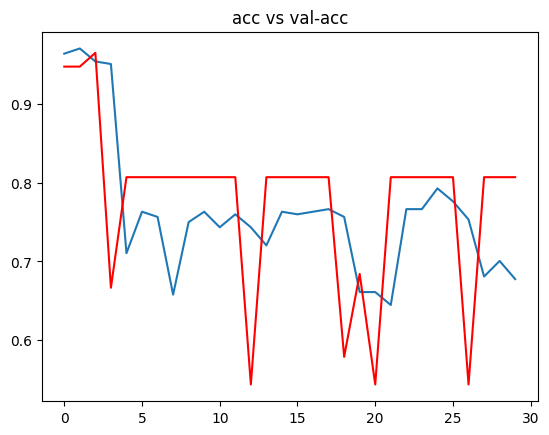

In [117]:
import matplotlib.pyplot as plt

plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = "red")

plt.title("acc vs val-acc")
plt.show()

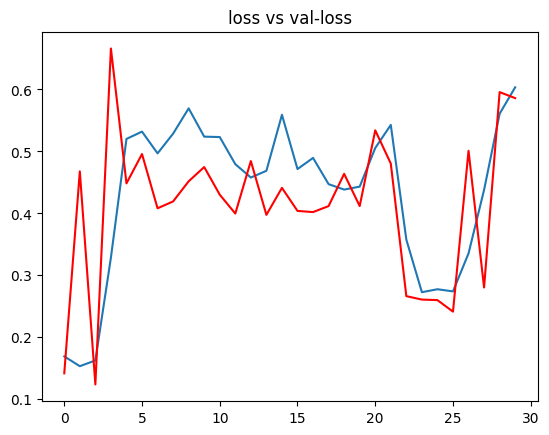

In [118]:
import matplotlib.pyplot as plt

plt.plot(h['loss'])
plt.plot(h['val_loss'], c = "red")

plt.title("loss vs val-loss")
plt.show()

In [119]:
# Model Accuracy
from keras.models import load_model

model = load_model("/content/bestmodel.h5")

#Model Accuracy

In [120]:
acc = model.evaluate_generator(test_data)[1]
print(f"The accuracy of our model is {acc*100} %")

The accuracy of our model is 96.49122953414917 %


In [121]:
from keras.preprocessing.image import load_img, img_to_array

In [122]:
train_data.class_indices

{'Cancerous': 0, 'Normal': 1}

In [123]:
from keras.preprocessing import image

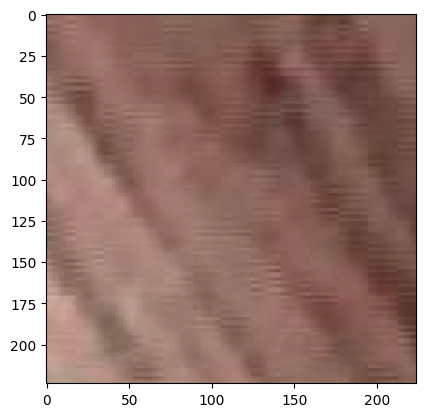

1/1 [==============================] - 0s 19ms/step
0.21001337
This tissue is a cancerous one


In [146]:
path = "/content/drive/MyDrive/Dataset/Laryngeal dataset-3/Cancerous/cropped125.png"

img = load_img(path, target_size = (224,224))
input_arr = img_to_array(img)/255

plt.imshow(input_arr)
plt.show()

input_arr.shape

input_arr = np.expand_dims(input_arr, axis= 0)

# Make predictions using the predict method
#predictions = model.predict(input_arr)

# Get the class prediction
"""class_prediction = np.argmax(predictions, axis=0)[0]
class_prediction"""
# 'class_prediction' will contain the predicted class label for your input data

pred = model.predict(input_arr)[0][0]
print(pred)

if pred >= 0.455:
  print("This tissue is not a cancerous one")
else:
  print("This tissue is a cancerous one")

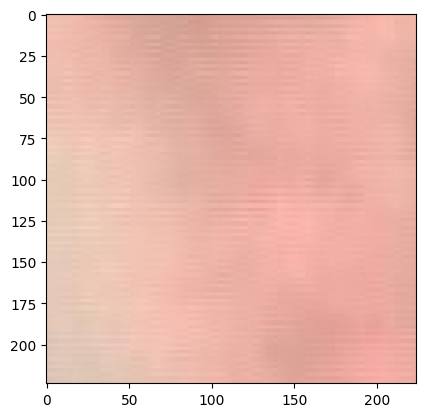

1/1 [==============================] - 0s 18ms/step
0.5676149
This tissue is not a cancerous one


In [144]:
path = "/content/drive/MyDrive/Dataset/Laryngeal dataset-3/Normal/cropped95.png"

img = load_img(path, target_size = (224,224))
input_arr = img_to_array(img)/255

plt.imshow(input_arr)
plt.show()

input_arr.shape

input_arr = np.expand_dims(input_arr, axis= 0)

# Make predictions using the predict method
#predictions = model.predict(input_arr)

# Get the class prediction
"""class_prediction = np.argmax(predictions, axis=0)[0]
class_prediction"""
# 'class_prediction' will contain the predicted class label for your input data

pred = model.predict(input_arr)[0][0]
print(pred)

if pred >= 0.45:
  print("This tissue is not a cancerous one")
else:
  print("This tissue is a cancerous one")